# What makes people in a country happy?

# Cleaning

## Imports

In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Data Munging

In [84]:
year2015 = pd.read_csv('./data/2015.csv')
year2016 = pd.read_csv('./data/2016.csv')
year2017 = pd.read_csv('./data/2017.csv')
year2018 = pd.read_csv('./data/2018.csv')
year2019 = pd.read_csv('./data/2019.csv')

year2015['year'] = '2015'
year2016['year'] = '2016'
year2017['year'] = '2017'
year2018['year'] = '2018'
year2019['year'] = '2019'
year2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [85]:
data = pd.concat([year2015, year2016,year2017,year2018,year2019])
data.set_index(data['year'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
year,,,,,,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025


In [108]:
df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')

def standardize_columns(df, year):
    df.columns = df.columns.str.replace('.', ' ').str.strip()
    df.rename(columns=standard_columns, inplace=True)
    df['Year'] = year 
    return df
standard_columns = {
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Economy  GDP per Capita': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Family': 'Social Support',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy Life Expectancy',
    'Health  Life Expectancy': 'Healthy Life Expectancy',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Freedom': 'Freedom to Make Life Choices',
    'Freedom to make life choices': 'Freedom to Make Life Choices',
    'Trust (Government Corruption)': 'Perceptions of Corruption',
    'Trust  Government Corruption': 'Perceptions of Corruption',
    'Perceptions of corruption': 'Perceptions of Corruption',
}
df_2015 = standardize_columns(df_2015,2015)
df_2016 = standardize_columns(df_2016,2016)
df_2017 = standardize_columns(df_2017,2017)
df_2018 = standardize_columns(df_2018,2018)
df_2019 = standardize_columns(df_2019,2019)
common_cols = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
               'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity', 'Year']
df_2015 = df_2015[common_cols]
df_2016 = df_2016[common_cols]
df_2017 = df_2017[common_cols]
df_2018 = df_2018[common_cols]
df_2019 = df_2019[common_cols]
df_merged = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)
for column in common_cols[1:-1]:
    if df_merged[column].isnull().any():
        df_merged[column].fillna(df_merged[column].mean(), inplace=True)
for column in common_cols[1:]:  
    df_merged[column] = df_merged[column].round(3)
df_merged.to_csv('data/merged.csv', index=False)

## EDA

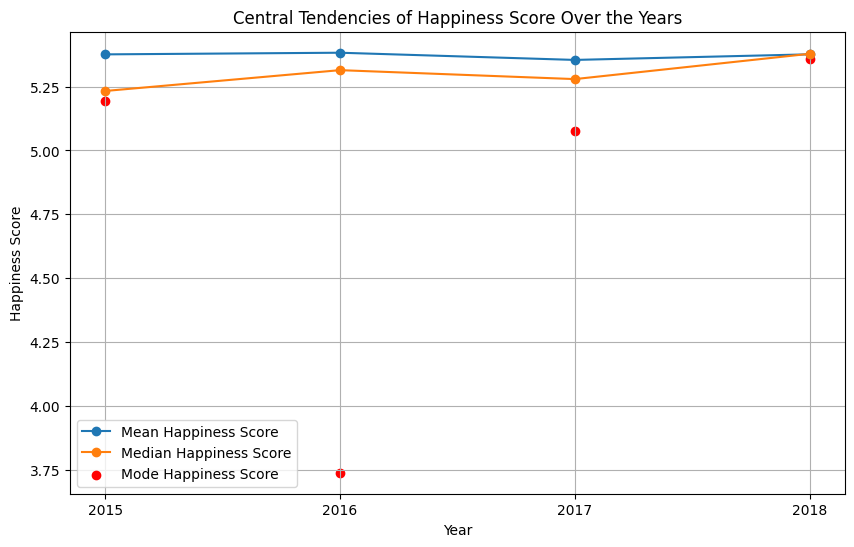

In [109]:
ct = df_merged.groupby('Year')['Happiness Score'].agg(
    mean='mean', 
    median='median', 
    mode=lambda x: x.mode()[0]
)
plt.figure(figsize=(10, 6))
plt.plot(ct.index, ct['mean'], marker='o', label='Mean Happiness Score')
plt.plot(ct.index, ct['median'],  marker='o', label='Median Happiness Score')
plt.scatter(ct.index, ct['mode'], color='red', label='Mode Happiness Score')
plt.xticks(ct.index, labels=[year for year in ct.index])
plt.title('Central Tendencies of Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
rankings_pivot = df_merged.pivot(index='Country', columns='Year', values='Happiness Rank')
ranking_changes = rankings_pivot.diff(axis=1)
stability = ranking_changes.abs().mean(axis=1)
stable_countries = stability[stability < 2].index.tolist()  
average_change = ranking_changes.mean(axis=1)
improved_countries = average_change[average_change < 0].index.tolist()
print("Stable Countries:", stable_countries)
print("Countries that Improved Their Ranking:", improved_countries)

Stable Countries: ['Australia', 'Austria', 'Belgium', 'Belize', 'Burundi', 'Canada', 'Central African Republic', 'Costa Rica', 'Denmark', 'Finland', 'Iceland', 'Iraq', 'Italy', 'Netherlands', 'New Zealand', 'Norway', 'Rwanda', 'Suriname', 'Sweden', 'Switzerland']
Countries that Improved Their Ranking: ['Afghanistan', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Comoros', 'Congo (Brazzaville)', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Iran', 'Ireland', 'Italy', 'Ivory Coast', 'Jamaica', 'Kenya', 'Kosovo', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 

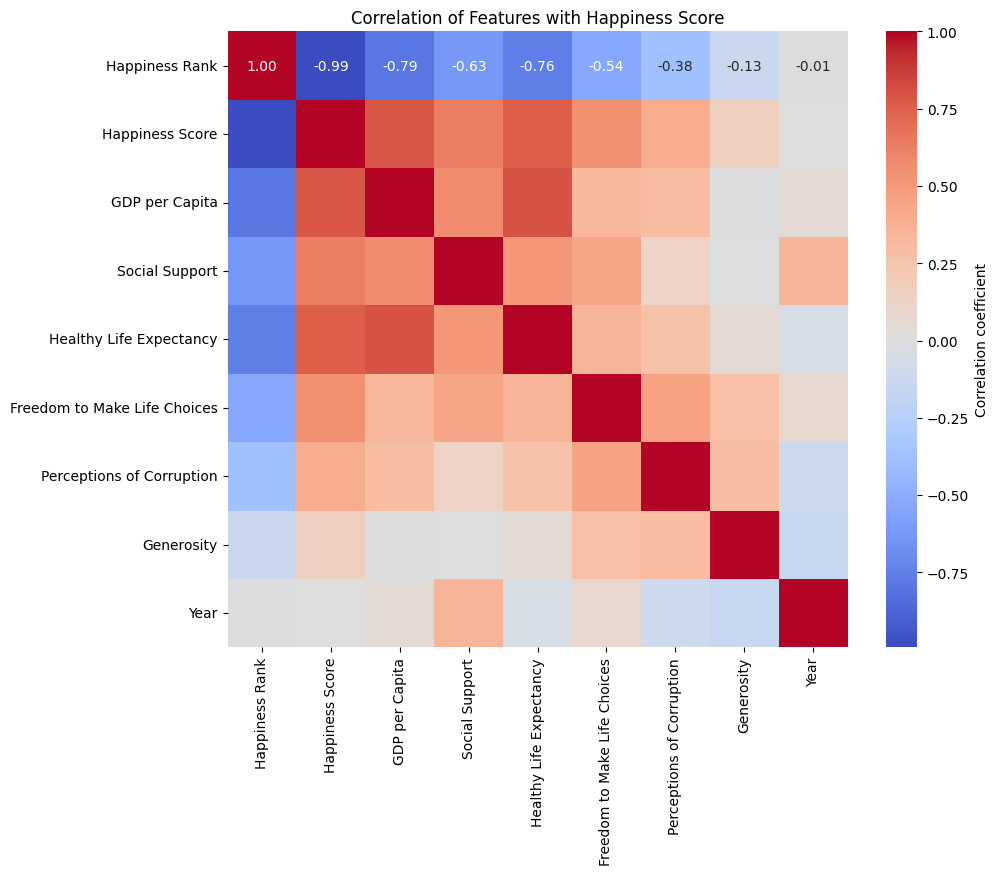

In [89]:
numeric_data = df_merged.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation of Features with Happiness Score')
plt.show()

Using a heatmap we can view the correlation between every attribute which is helpful in identifying what actually correlate to happiness and other attributes. Taking a look we can see that GDP, Social Support, Life Expectancy, Freedom all have strong correlation with happiness score. This makes sense because those aespects all contribute to a healthy functioning society. If I were the president and provided the data, I would work on social services to provide for citizens since if you take a look at social services it also has strong correlation to the other features of Life Expectancy, Freedom, etc. So building up social services would cause those other attributes to go up as well due to their relation. One thing to note is the almost perfectly negative correlation between happiness ranking and happiness value. This is actually expected since as happiness value goes up the ranking go down since for ranking 1 means high happiness while for value the higher the number the better.

## Model

Our first ist Linear Regression Model. 

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
X_train = df_merged[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_train = df_merged['Happiness Score']
X_test = df_2019[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_test = df_2019[['Happiness Score']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Linear Regression

In [138]:
model = LinearRegression()


model.fit(X_train, y_train) 
scores = cross_val_score(model, X_train, y_train, cv=5) 
print("Cross-validated scores:", scores)


y_val_pred_LR = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred_LR)
r2 = r2_score(y_val, y_val_pred_LR)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'R^2 Score on Validation Set: {r2}')

y_test_pred_LR = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_LR)
r2_test = r2_score(y_test, y_test_pred_LR)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R^2 Score on Test Set: {r2_test}')


Cross-validated scores: [0.79803977 0.84920862 0.75581588 0.6808925  0.78248497]
Mean Squared Error on Validation Set: 0.3564607497063062
R^2 Score on Validation Set: 0.6884603663911049
Mean Squared Error on Test Set: 0.2804670328609654
R^2 Score on Test Set: 0.7721805229916808


### Random Forest

Our second model is a a Random Forest 

In [134]:
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

model_RF.fit(X_train, y_train)

y_val_pred_RF = model_RF.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred_RF)
r2 = r2_score(y_val, y_val_pred_RF)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'R^2 Score on Validation Set: {r2}')

Mean Squared Error on Validation Set: 0.30104191112777773
R^2 Score on Validation Set: 0.736895333438698


### Support Vector Regression

Our third model is support vector machine(Support Vector Regression)

In [137]:
scaler = StandardScaler()
X_train_SVR = scaler.fit_transform(X_train)
X_val_SVR = scaler.transform(X_val)
X_test_SVR = scaler.transform(X_test)

model_SVR = SVR(kernel='rbf')  
model_SVR.fit(X_train, y_train)

y_pred_SVR= model_SVR.predict(X_train_SVR)

# Calculate MSE and R-squared
mse = mean_squared_error(y_train, y_pred_SVR)
r2 = r2_score(y_train, y_pred_SVR)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

y_test_pred_SVR = model.predict(X_test)
print(y_test_pred_SVR)
mse_test = mean_squared_error(y_test, y_test_pred_SVR)
r2_test = r2_score(y_test, y_test_pred_SVR)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R^2 Score on Test Set: {r2_test}')

Mean Squared Error: 1.3141488672562407
R^2 Score: -0.0025098334627626784
[-197.03220571 -197.00827391 -196.95426013 -197.00669217 -197.02934129
 -196.98666783 -197.0333757  -197.03904587 -197.0323608  -197.0633571
 -197.02312238 -197.24600829 -197.15741585 -196.9591055  -197.07787884
 -196.98609594 -197.08210107 -197.09190063 -197.10432965 -197.17680707
 -197.09034676 -197.0791678  -197.32416875 -197.11333952 -197.15851546
 -197.26986616 -197.45534479 -197.18065664 -197.01310815 -197.14556623
 -197.22472808 -197.34317342 -197.22315525 -196.9230504  -197.48405698
 -197.18112115 -197.14453349 -197.21785225 -197.23495515 -197.21530942
 -197.35966182 -197.24681233 -197.33531685 -197.13055842 -197.48037833
 -197.43842606 -197.27303674 -197.31724169 -197.22357229 -197.37441932
 -197.13247194 -197.27517311 -197.2866741  -197.26660198 -197.1681752
 -197.38120222 -197.27425589 -197.11981    -197.51398372 -197.26126473
 -197.50168143 -197.31014305 -197.370773   -197.20261284 -197.38544419
 -197.

/Users/TY/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/TY/anaconda3/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
